# #pyabsa Installation


In [167]:
city = input("Enter the city name :")

Enter the city name :hyderabad


In [120]:
!pip install pyabsa

C:\Users\khali\anaconda3\envs\my_env\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  del self._target, self._args, self._kwargs
C:\Users\khali\anaconda3\envs\my_env\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs
C:\Users\khali\anaconda3\envs\my_env\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=10>
  del self._target, self._args, self._kwargs
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x25154d606a0>


## Find Available Checkpoints For **Current Version**

In [93]:
from pyabsa import available_checkpoints
checkpoint_map = available_checkpoints(False)

In [94]:
from pyabsa import ATEPCCheckpointManager

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english',
                                   auto_device=True  # False means load model on CPU
                                   )


[2023-04-23 23:19:38] (2.0.28) Load aspect extractor from checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43
[2023-04-23 23:19:38] (2.0.28) config: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.config
[2023-04-23 23:19:38] (2.0.28) state_dict: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.state_dict
[2023-04-23 23:19:38] (2.0.28) model: None
[2023-04-23 23:19:38] (2.0.28) tokenizer: checkpoints\ATEPC_ENGLISH_CHECKPOINT\fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43\fast_lcf_atepc.tokenizer
[2023-04-23 23:19:38] (2.0.28) Set Model Device: cpu
[2023-04-23 23:19:38] (2.0.28) Device Name: Unknown


Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['mask_predictions.classifier.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.weight', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.dense.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have b

# Web Scraping

In [95]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [194]:
from selenium import webdriver
import time

driver = webdriver.Chrome(r"C:/Users/khali/Downloads/chromedriver_win32/chromedriver.exe")
driver.maximize_window();
driver.get(r"https://twitter.com/i/flow/login")
time.sleep(3)


my_user = {Your_Username}
# my_pass = getpass.getpass()
my_pass = {Your_Password}

# Now you dont even need to sign in for scraping tweets



C:\Users\khali\AppData\Local\Temp\ipykernel_12060\1244714932.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:/Users/khali/Downloads/chromedriver_win32/chromedriver.exe")


In [195]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")

user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [196]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
time.sleep(3)
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [197]:
search_item = f"{city} experience"
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [198]:
all_tweets = set()


tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>500:
        break

C:\Users\khali\AppData\Local\Temp\ipykernel_12060\1359079071.py:4: ResourceWarning: unclosed <socket.socket fd=6388, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('::1', 62515, 0, 0), raddr=('::1', 62513, 0, 0)>
  tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")


In [173]:
all_tweets = list(all_tweets) #Conversion to list
all_tweets[0]

'I’m #hiring. Talent Acquisition Specialists with 1 to 5 yeras of work experience to work form office at Hi-Tech City Road, Hyderabad.\n#itrecruiting #itrecruiters #itrecruiter #itrecruitment #technicalrecruiters #technicalrecruiter #technicalhiring #jobopp…https://lnkd.in/g_DGcTJ2'

In [175]:

# You can inference from a list of setences or a DatasetItem from PyABSA 
examples = all_tweets #['Staff was very friendly but they were late and food was good Food is good Staff is good','climate is good']
inference_source = examples
atepc_result = aspect_extractor.extract_aspect(inference_source=inference_source,  #
                          pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                          traverse = True  #for nested sentiment checking
                          )



classifying aspect sentiments:   0%|                                                                                         | 0/8 [00:00<?, ?it/s]C:\Users\khali\AppData\Roaming\Python\Python39\site-packages\pyabsa\tasks\AspectTermExtraction\prediction\aspect_extractor.py:647: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()
classifying aspect sentiments: 100%|█████████████████████████████████████████████████████████████████████████████████| 8/8 [04:18<00:00, 32.26s/it]

[2023-04-24 01:16:19] (2.0.28) The results of aspect term extraction have been saved in C:\Users\khali\Downloads\Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.json
[2023-04-24 01:16:19] (2.0.28) Example 0: I ’ m # hiring . <Talent:Neutral Confidence:0.9989191293716431> Acquisition Specialists with 1 to 5 yeras of work experience to work form office at Hi - Tech City Road , Hyderabad . 
 # itrecruiting # itrecruiters # itrecruiter # itrecruitment # technicalrecruiters # technicalrecruiter # technicalhiring # jobopp … https : / / lnkd . in / g _ DGcTJ2
[2023-04-24 01:16:19] (2.0.28) Example 1: Planning to drive from Hyderabad to Bijapur ? Here ' s all you need to know to plan your Hyderabad to Bijapur road trip . # DiscoverIndia # Travel # RoadTrip # Socialmaharaj # Blogger
[2023-04-24 01:16:19] (2.0.28) Example 2: Looking for an experienced SQL Developer in Hyderabad for inventionyard ! Must have 4 to 6 years expertise and hands on experience on SQL , T - SQL 

In [176]:
atepc_result

[{'sentence': 'I ’ m # hiring . Talent Acquisition Specialists with 1 to 5 yeras of work experience to work form office at Hi - Tech City Road , Hyderabad . \n # itrecruiting # itrecruiters # itrecruiter # itrecruitment # technicalrecruiters # technicalrecruiter # technicalhiring # jobopp … https : / / lnkd . in / g _ DGcTJ2',
  'IOB': ['O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-ASP',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   '[SEP]'],
  'tokens': ['I',
   '’',
   'm',
   '#',
   'hiring',
   '.',
   'Talent',
   'Acquisition',
   'Specialists',
   'with',
   '1',
   'to',
   '5',
   'yeras',
   'of',
   'work',
   

In [178]:
# for tweet in atepc_result:
#     print(tweet["aspect"],tweet["sentiment"])
sentiment_score = {
    "food":0,
    "tourist spots":0,
    "safety":0,
    "activities":0,
    "cleanliness":0,
    "OverAll Experience":0
}
for tweet in atepc_result:
    i=0  
    for _ in tweet["aspect"]:
        _ = _.lower()       
        if _.find("experience")!=-1 or _.find("food")!=-1 or _.find("hotel")!=-1 or _.find("cuisine")!=-1 or _.find("flav")!=-1 or _.find("staff")!=-1 or _.find("meal")!=-1:
            if tweet["sentiment"][i]=="Negative":
                sentiment_score["food"] += -1
            elif tweet["sentiment"][i]=="Positive":
                sentiment_score["food"] += 1
                
        elif _.find("place")!=-1 or _.find(city)!=-1 or _.find("spot")!=-1 or _.find("attraction")!=-1 or  _.find("location")!=-1 or _.find("dist")!=-1 or _.find("destination")!=-1 or _.find("travel")!=-1:
            if tweet["sentiment"][i]=="Negative":
                sentiment_score["tourist spots"] += -1
            elif tweet["sentiment"][i]=="Positive":
                sentiment_score["tourist spots"] += 1
                
        elif _.find("scam")!=-1 or _.find("rob")!=-1 or _.find("safe")!=-1 or _.find("security")!=-1 or _.find("law")!=-1 or _.find("order")!=-1 or _.find("cops")!=-1 or _.find("police")!=-1:
            if tweet["sentiment"][i]=="Negative":
                sentiment_score["safety"] += -1
            elif tweet["sentiment"][i]=="Positive":
                sentiment_score["safety"] += 1
       
 
        elif  _.find("pool")!=-1 or _.find("fees")!=-1 or _.find("sport")!=-1 or _.find("adventure")!=-1 or _.find("thril")!=-1 or _.find("fun")!=-1 or _.find("club")!=-1:
            if tweet["sentiment"][i]=="Negative":
                sentiment_score["activities"] += -1
            elif tweet["sentiment"][i]=="Positive":
                sentiment_score["activities"] += 1
           
                
        elif _.find("clean")!=-1 or _.find("toilet")!=-1 or _.find("services")!=-1 or _.find("staff")!=-1 or _.find("diagnosis")!=-1:
            sentiment_score["cleanliness"] += 1
        elif _.find("dirt")!=-1:
            sentiment_score["cleanliness"] += -1
            
        i += 1
sentiment_score["OverAll Experience"]=sentiment_score["food"]+sentiment_score["tourist spots"]+sentiment_score["activities"]+sentiment_score["safety"]+sentiment_score["cleanliness"]
print(sentiment_score)

{'food': 5, 'tourist spots': 1, 'safety': 1, 'activities': 3, 'cleanliness': 2, 'OverAll Experience': 12}


In [179]:
!pip install nltk

C:\Users\khali\anaconda3\envs\my_env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\khali\anaconda3\envs\my_env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
C:\Users\khali\anaconda3\envs\my_env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x25163dfb520>


In [180]:

import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [181]:
stp_words = stopwords.words('english')

In [182]:
df = pd.DataFrame(all_tweets,columns=['tweets'])

In [183]:
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [184]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)

In [185]:
!pip install seaborn

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2515a5929a0>
C:\Users\khali\anaconda3\envs\my_env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\khali\anaconda3\envs\my_env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=8>
  return process_handler(cmd, _system_body)
C:\Users\khali\anaconda3\envs\my_env\lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)


In [186]:
import matplotlib.pyplot as plt
import seaborn as sns


In [187]:

df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,29,29,29,29
neutral,44,44,44,44
positive,117,117,117,117


<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

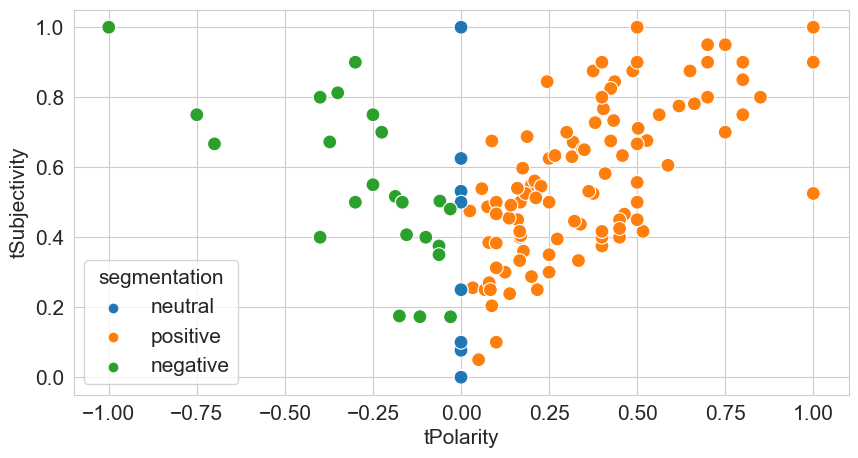

In [188]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')


<Axes: xlabel='segmentation', ylabel='count'>

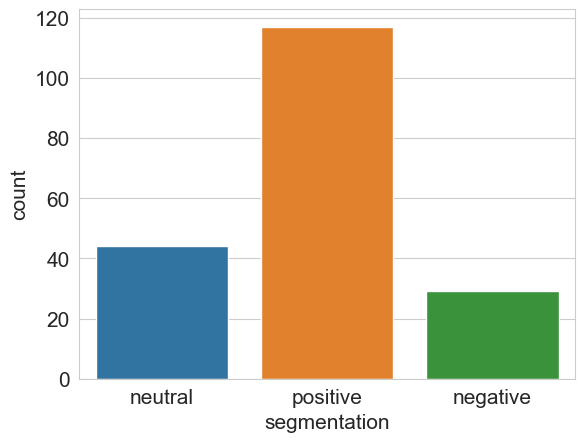

In [189]:
sns.countplot(data=df,x='segmentation')